In [140]:
# data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# data visualization
from plotly import tools
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [141]:
data = pd.read_csv(r'C:\Users\IRINNISAR\Downloads\pima-indians-diabetes-database\diabetes.csv')
display(data.info(),data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [142]:
# Check missing data to know the sum of nan in each column
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

[[Text(0, 0, 'No have diabetes'), Text(0, 0, 'Have diabetes')]]

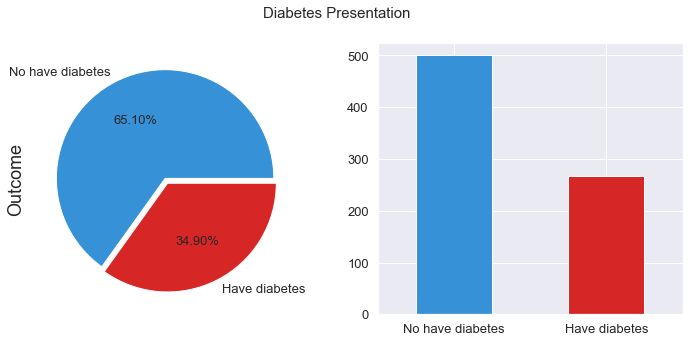

In [143]:
fig, ax = plt.subplots(1, 2, figsize = (12, 5))

fig.suptitle('Diabetes Presentation', fontsize = 15)
colors = ["#3791D7", "#D72626"]
labels = "No have diabetes", "Have diabetes"

data.Outcome.value_counts().plot.pie(explode=[0,0.05], labels=labels, autopct="%1.2f%%", fontsize=13, ax=ax[0], colors=colors)#, startangle=70)
data.Outcome.value_counts().plot.bar(ax=ax[1], rot = 0, fontsize=13, color =colors).set(xticklabels = ["No have diabetes", "Have diabetes"])


In [144]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

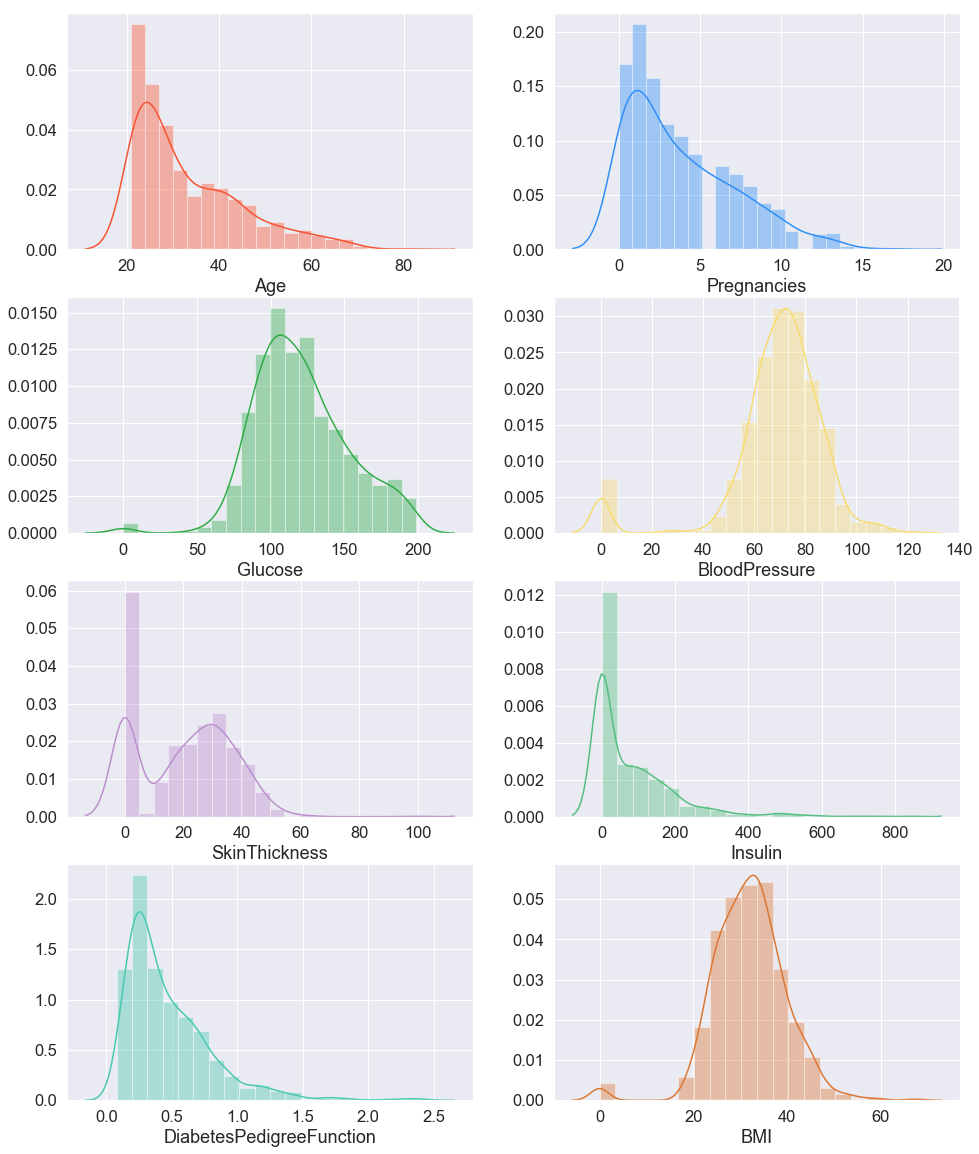

In [146]:
fig, ax = plt.subplots(4,2, figsize=(16, 20))

sns.distplot(data.Age, ax=ax[0,0], bins=20, color="#F7522F")
sns.distplot(data.Pregnancies, ax=ax[0,1], bins=20, color="#2F8FF7")
sns.distplot(data.Glucose, ax=ax[1,0], bins=20, color="#2EAD46")
sns.distplot(data.BloodPressure, ax=ax[1,1], bins=20, color="#F7DC6F") 
sns.distplot(data.SkinThickness, ax=ax[2,0], bins=20, color="#BB8FCE")
sns.distplot(data.Insulin, ax=ax[2,1], bins=20, color="#52BE80")
sns.distplot(data.DiabetesPedigreeFunction, ax=ax[3,0], bins=20, color="#48C9B0")
sns.distplot(data.BMI, ax=ax[3,1], bins= 20, color="#DC7633")

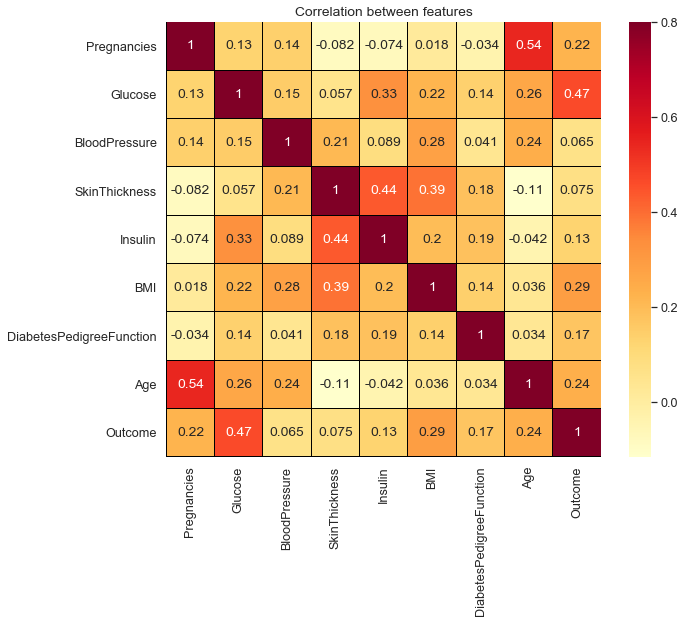

In [147]:
correlation=data.corr()

sns.set(font_scale=1.15)
plt.figure(figsize=(10,8))

sns.heatmap(correlation, vmax=0.8, linewidths=0.01, square=True, annot=True, cmap='YlOrRd', linecolor="black")
plt.title('Correlation between features');

In [154]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# X = data.iloc[:, :-1]
# y = data.iloc[:, -1]
# Same as
X = data[['Age','Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','DiabetesPedigreeFunction','BMI']]
y = data.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((576, 8), (192, 8), (576,), (192,))

In [165]:
data.iloc[:, :-1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


In [166]:
data.iloc[:, -1]

0      1
1      0
2      1
3      0
4      1
5      0
6      1
7      0
8      1
9      1
10     0
11     1
12     0
13     1
14     1
15     1
16     1
17     1
18     0
19     1
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     0
28     0
29     0
      ..
738    0
739    1
740    1
741    0
742    0
743    1
744    0
745    0
746    1
747    0
748    1
749    1
750    1
751    0
752    0
753    1
754    1
755    1
756    0
757    1
758    0
759    1
760    0
761    1
762    0
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

C:\Users\IRINNISAR\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



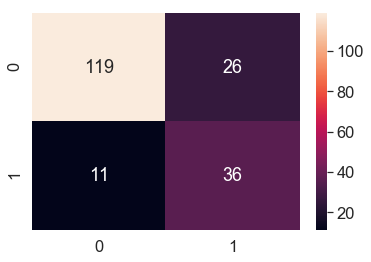

Accuracy : 80.729%
Accuracy : 80.729%


In [155]:
#Model
model=LogisticRegression()

#fiting the model
model.fit(X_train, y_train)

#prediction
y_pred = model.predict(X_test)

#Plot the confusion matrix
sns.set(font_scale=1.5)
confusion = confusion_matrix(y_pred, y_test)
sns.heatmap(confusion, annot=True, fmt='g')
plt.show()

#Accuracy
accuracy=model.score(X_test, y_test)
print("Accuracy : %s" % "{0:.3%}".format(accuracy))
# or
accuracy1=accuracy_score(y_test, y_pred)
print("Accuracy : %s" % "{0:.3%}".format(accuracy1))

In [156]:
print('TN: ',confusion[0,0])
print('TP: ',confusion[1,1])
print('FP: ',confusion[0,1])
print('FN: ',confusion[1,0])
print('Right classification: ', confusion[1,1]+confusion[0,0])
print('Wrong classification: ', confusion[0,1]+confusion[1,0])

TN:  119
TP:  36
FP:  26
FN:  11
Right classification:  155
Wrong classification:  37


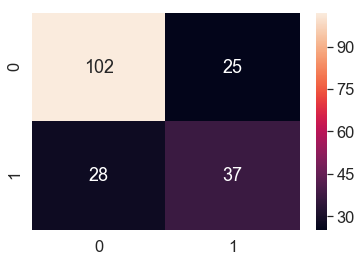

Accuracy : 72.396%
Accuracy : 72.396%


In [157]:
#Model
model1=DecisionTreeClassifier()

#fiting the model
model1.fit(X_train, y_train)

#prediction
y_pred = model1.predict(X_test)

#Plot the confusion matrix
sns.set(font_scale=1.5)
confusion = confusion_matrix(y_pred, y_test)
sns.heatmap(confusion, annot=True, fmt='g')
plt.show()

#Accuracy
accuracy2=model1.score(X_test, y_test)
print("Accuracy : %s" % "{0:.3%}".format(accuracy2))
# or
accuracy3=accuracy_score(y_test, y_pred)
print("Accuracy : %s" % "{0:.3%}".format(accuracy3))

In [158]:
print('TN: ',confusion[0,0])
print('TP: ',confusion[1,1])
print('FP: ',confusion[0,1])
print('FN: ',confusion[1,0])
print('Right classification: ', confusion[1,1]+confusion[0,0])
print('Wrong classification: ', confusion[0,1]+confusion[1,0])

TN:  102
TP:  37
FP:  25
FN:  28
Right classification:  139
Wrong classification:  53


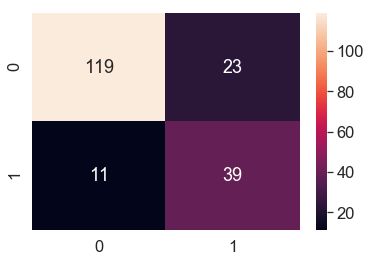

Accuracy : 82.292%
Accuracy : 82.292%


In [159]:
#Model
model2=GradientBoostingClassifier()

#fiting the model
model2.fit(X_train, y_train)

#prediction
y_pred = model2.predict(X_test)

#Plot the confusion matrix
sns.set(font_scale=1.5)
confusion = confusion_matrix(y_pred, y_test)
sns.heatmap(confusion, annot=True, fmt='g')
plt.show()

#Accuracy
accuracy4=model2.score(X_test, y_test)
print("Accuracy : %s" % "{0:.3%}".format(accuracy4))
# or
accuracy5=accuracy_score(y_test, y_pred)
print("Accuracy : %s" % "{0:.3%}".format(accuracy5))

In [160]:
print('TN: ',confusion[0,0])
print('TP: ',confusion[1,1])
print('FP: ',confusion[0,1])
print('FN: ',confusion[1,0])
print('Right classification: ', confusion[1,1]+confusion[0,0])
print('Wrong classification: ', confusion[0,1]+confusion[1,0])

TN:  119
TP:  39
FP:  23
FN:  11
Right classification:  158
Wrong classification:  34


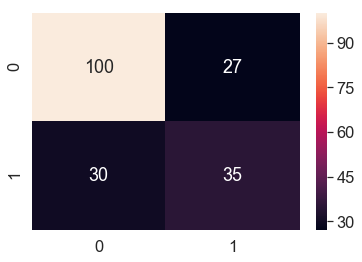

Accuracy : 70.312%
Accuracy : 70.312%


In [169]:
#Model
model3=MLPClassifier()

#fiting the model
model3.fit(X_train, y_train)

#prediction
y_pred = model3.predict(X_test)

#Plot the confusion matrix
sns.set(font_scale=1.5)
confusion = confusion_matrix(y_pred, y_test)
sns.heatmap(confusion, annot=True, fmt='g')
plt.show()

#Accuracy
accuracy6=model3.score(X_test, y_test)
print("Accuracy : %s" % "{0:.3%}".format(accuracy6))
# or
accuracy7=accuracy_score(y_test, y_pred)
print("Accuracy : %s" % "{0:.3%}".format(accuracy7))

In [170]:
print('TN: ',confusion[0,0])
print('TP: ',confusion[1,1])
print('FP: ',confusion[0,1])
print('FN: ',confusion[1,0])
print('Right classification: ', confusion[1,1]+confusion[0,0])
print('Wrong classification: ', confusion[0,1]+confusion[1,0])

TN:  100
TP:  35
FP:  27
FN:  30
Right classification:  135
Wrong classification:  57


In [171]:
# With Keras

import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [205]:
X = data[['Age','Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','DiabetesPedigreeFunction','BMI']]
y = data.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((576, 8), (192, 8), (576,), (192,))

In [207]:
model4 = Sequential()
model4.add(Dense(100, activation='relu', input_dim=8))
model4.add(Dense(50, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))

# Compile the model
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
model4.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)

Epoch 1/50
576/576 [==============================] - 1s 1ms/step - loss: 2.3025 - acc: 0.5781
Epoch 2/50
576/576 [==============================] - 0s 127us/step - loss: 1.2067 - acc: 0.5885
Epoch 3/50
576/576 [==============================] - 0s 127us/step - loss: 0.9613 - acc: 0.6337
Epoch 4/50
576/576 [==============================] - 0s 141us/step - loss: 1.0592 - acc: 0.5920
Epoch 5/50
576/576 [==============================] - 0s 144us/step - loss: 0.9167 - acc: 0.6233
Epoch 6/50
576/576 [==============================] - 0s 158us/step - loss: 1.1152 - acc: 0.6285
Epoch 7/50
576/576 [==============================] - 0s 115us/step - loss: 1.0368 - acc: 0.6389
Epoch 8/50
576/576 [==============================] - 0s 116us/step - loss: 0.8269 - acc: 0.6753
Epoch 9/50
576/576 [==============================] - 0s 168us/step - loss: 0.6700 - acc: 0.6806
Epoch 10/50
576/576 [==============================] - 0s 170us/step - loss: 0.7440 - acc: 0.6354
Epoch 11/50
576/576 [==========

In [208]:
pred_train= model4.predict(X_train)
scores = model4.evaluate(X_train, y_train, verbose=0)
print("Accuracy on training data: %s" % "{0:.3%}".format(scores[1]))
print('Error on training data: %.3f' % (1 - scores[1])) 
 
pred_test= model4.predict(X_test)
scores2 = model4.evaluate(X_test, y_test, verbose=0)
print("Accuracy on test data: %s" % "{0:.3%}".format(scores2[1]))
print('Error on test data: %.3f' % (1 - scores2[1]))

#print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))    

Accuracy on training data: 76.215%
Error on training data: 0.238
Accuracy on test data: 72.396%
Error on test data: 0.276
